In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
labels = pd.read_csv("data/labels.csv")

path_train = "data/train/"

filenames = [path_train + fname + ".jpg" for fname in labels['id']]

labels_np = labels['breed'].to_numpy()
unique_breeds = np.unique(labels_np)

cor = dict([(breed, idx) for idx, breed in enumerate(unique_breeds)])

y = np.array([cor[breed] for breed in labels['breed']])
y.shape

(10222,)

In [3]:
# Resize images
import cv2

IMG_SIZE = 150

imgs = []
for fname in filenames:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC))

imgs = np.array(imgs)

In [4]:
X = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2]*imgs.shape[3])
X.shape

(10222, 67500)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

y_train_1 = (y_train==1)
y_test_1  = (y_test==1)

In [6]:
y_train_1

array([False, False, False, ..., False,  True, False])

In [7]:
#from sklearn.ensemble import RandomForestClassifier


#clf = RandomForestClassifier(random_state=0)
#clf.fit(X_train, y_train_1)
#pred = clf.predict_proba(X_test)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

#pred = sgd_clf.predict(X_test[0])

SGDClassifier(random_state=42)

In [30]:
pred = sgd_clf.predict(X_test)

In [31]:
label_to_breed = dict([(idx, breed) for breed, idx in cor.items()])

In [41]:
aa = [idx for idx, cond in enumerate(pred) if (cond == True)]

In [42]:
print([y_test_1[i] for i in aa])

[False, False, False, False, False]


In [45]:
aaa = [idx for idx, cond in enumerate(y_test_1) if (cond == True)]

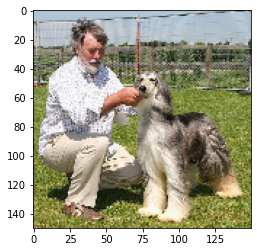

In [48]:
plt.imshow(X_test[69].reshape(IMG_SIZE,IMG_SIZE,3))